Tau on unit level plots:
1. Distance between taus on the full signal and taus on trial based
2. Taus on the full signal and taus on trials (40 trials per unit)

In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib as mpl
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import joypy

from isttc.scripts.cfg_global import project_folder_path
from isttc.tau import fit_single_exp, fit_single_exp_2d, func_single_exp_monkey

In [2]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
plt.rcParams['svg.fonttype'] = 'none'

In [3]:
dataset_folder = project_folder_path + 'results\\mice\\dataset\\cut_30min\\'
fig_folder = project_folder_path + 'results\\mice\\fig_draft_paper\\'

In [4]:
calc_taus = False
save_taus = False
save_fig = False

#### Load data

In [5]:
#units_info_df = pd.read_pickle(dataset_folder + 'sua_list_constrained_units_df.pkl')

units_info_df = pd.read_pickle(dataset_folder + 'lv_df.pkl')
units_info_df_subset = units_info_df[['unit_id', 'ecephys_structure_acronym', 'fr_hz_spont_30min', 'lv']].copy()
units_info_df_subset.head(2)

,unit_id,ecephys_structure_acronym,fr_hz_spont_30min,lv
0,950913540,VISam,6.038333,1.239003
1,950915005,VISam,4.030556,0.628989


In [7]:
if calc_taus:
    acf_full_df_file = dataset_folder + 'binned\\acf_full_50ms_20lags_df.pkl'
    acf_full_df = pd.read_pickle(acf_full_df_file)
    
    acf_isttc_full_df_file = dataset_folder + 'non_binned\\acf_isttc_full_50ms_20lags_df_25dt.pkl'
    acf_isttc_full_df = pd.read_pickle(acf_isttc_full_df_file)

#### Calculate tau per unit

In [8]:
n_lags = 20
acf_cols = ['acf_' + str(i) for i in range(n_lags+1)]
print('acf_cols {}'.format(acf_cols))

acf_cols ['acf_0', 'acf_1', 'acf_2', 'acf_3', 'acf_4', 'acf_5', 'acf_6', 'acf_7', 'acf_8', 'acf_9', 'acf_10', 'acf_11', 'acf_12', 'acf_13', 'acf_14', 'acf_15', 'acf_16', 'acf_17', 'acf_18', 'acf_19', 'acf_20']


In [9]:
if calc_taus:
    acf_full_2d = acf_full_df[acf_cols].values
    print(f'acf_2d shape {acf_full_2d.shape}')
    acf_full_unit_ids = acf_full_df['unit_id'].values
    print(f'acf_full_unit_ids shape {acf_full_unit_ids.shape}')
    
    acf_full_dict = {}
    for unit_id_idx, unit_id in enumerate(acf_full_unit_ids):
        if unit_id_idx % 100 == 0:
            print(f'#####\nProcessing unit {unit_id}, {unit_id_idx+1}/{len(acf_full_unit_ids)}, {datetime.now()}')
        fit_popt, fit_pcov, tau, tau_ci, fit_r_squared, explained_var, log_message = fit_single_exp(acf_full_2d[unit_id_idx,:],
                                                                                  start_idx_=1, exp_fun_=func_single_exp_monkey)
        taus = {'tau':tau,
                'tau_lower':tau_ci[0],
                'tau_upper':tau_ci[1],
                'fit_r_squared': fit_r_squared,
                'explained_var': explained_var,
                'popt': fit_popt,
                'pcov': fit_pcov,
                'log_message': log_message}
        acf_full_dict[unit_id] = {'taus': taus,
                                  'acf': acf_full_2d[unit_id_idx,:]}

In [10]:
if calc_taus:
    isttc_full_2d = acf_isttc_full_df[acf_cols].values
    print(f'isttc_full_2d shape {isttc_full_2d.shape}')
    isttc_full_unit_ids = acf_isttc_full_df['unit_id'].values
    print(f'isttc_full_unit_ids shape {isttc_full_unit_ids.shape}')
    
    isttc_full_dict = {}
    for unit_id_idx, unit_id in enumerate(isttc_full_unit_ids):
        if unit_id_idx % 1000 == 0:
            print(f'#####\nProcessing unit {unit_id}, {unit_id_idx+1}/{len(isttc_full_unit_ids)}, {datetime.now()}')
        fit_popt, fit_pcov, tau, tau_ci, fit_r_squared, explained_var, log_message = fit_single_exp(isttc_full_2d[unit_id_idx,:],
                                                                                  start_idx_=1, exp_fun_=func_single_exp_monkey)
        taus = {'tau':tau,
                'tau_lower':tau_ci[0],
                'tau_upper':tau_ci[1],
                'fit_r_squared': fit_r_squared,
                'explained_var': explained_var,
                'popt': fit_popt,
                'pcov': fit_pcov,
                'log_message': log_message}
        isttc_full_dict[unit_id] = {'taus': taus,
                                    'acf': isttc_full_2d[unit_id_idx,:]}

In [11]:
if calc_taus and save_taus:
    with open(dataset_folder + 'non_binned\\acf\\acf_isttc_full_50ms_20lags_25dt_dict.pkl', "wb") as f:
        pickle.dump(isttc_full_dict, f)

In [12]:
if calc_taus and save_taus:
    with open(dataset_folder + 'binned\\acf\\acf_full_50ms_20lags_dict.pkl', "wb") as f:
        pickle.dump(acf_full_dict, f)

#### Load calculated taus

In [13]:
with open(dataset_folder + 'non_binned\\acf_isttc_full_50ms_20lags_dict_25dt.pkl', "rb") as f:
    isttc_full_dict = pickle.load(f)

with open(dataset_folder + 'binned\\acf_full_50ms_20lags_dict.pkl', "rb") as f:
    acf_full_dict = pickle.load(f)

with open(dataset_folder + 'binned\\pearsonr_trial_avg_50ms_20lags_dict.pkl', "rb") as f:
    pearsonr_trial_avg_dict = pickle.load(f)

# with open(dataset_folder + 'non_binned\\sttc_trial_avg_50ms_20lags_dict.pkl', "rb") as f:
#     sttc_trial_avg_dict = pickle.load(f)

with open(dataset_folder + 'non_binned\\sttc_trial_concat_50ms_20lags_dict_25dt.pkl', "rb") as f:
    sttc_trial_concat_dict = pickle.load(f)

In [14]:
print(f'len isttc_full_dict {len(isttc_full_dict)}')
print(f'len acf_full_dict {len(acf_full_dict)}')
print(f'len pearsonr_trial_avg_dict {len(pearsonr_trial_avg_dict)}')
# print(f'len sttc_trial_avg_dict {len(sttc_trial_avg_dict)}')
print(f'len sttc_trial_concat_dict {len(sttc_trial_concat_dict)}')

len isttc_full_dict 5775
len acf_full_dict 5775
len pearsonr_trial_avg_dict 5775
len sttc_trial_concat_dict 5775


#### Prep data for plots

In [15]:
def calculate_acf_decline_flag(acf_, start_idx=3, end_idx=5):
    acf_decay = np.all(np.diff(acf_[start_idx:end_idx]) <= 0)
    return acf_decay

In [16]:
data = []
for unit_id, unit_data in acf_full_dict.items():
    taus = unit_data['taus']  
    data.append({
        'unit_id': unit_id,
        'tau': taus['tau'],
        # 'tau_lower': taus['tau_lower'],
        # 'tau_upper': taus['tau_upper'],
        'fit_r_squared': taus['fit_r_squared'],
        'decline_150_250': calculate_acf_decline_flag(unit_data['acf'], start_idx=2, end_idx=4)
    })
acf_full_plot_df = pd.DataFrame(data)
acf_full_plot_df['method'] = 'acf_full'
acf_full_plot_df['tau_ms'] = acf_full_plot_df['tau'] * 50
acf_full_plot_df = acf_full_plot_df.merge(units_info_df_subset, on='unit_id', how='left')

rows_with_nans_df = acf_full_plot_df[acf_full_plot_df.isna().any(axis=1)]
n_rows_with_nan = len(rows_with_nans_df)
print(f'N rows with NaNs {n_rows_with_nan}')

acf_full_plot_df.head(2)

N rows with NaNs 0


,unit_id,tau,fit_r_squared,decline_150_250,method,tau_ms,ecephys_structure_acronym,fr_hz_spont_30min,lv
0,950913540,0.580319,9.361658e-01,False,acf_full,29.015926,VISam,6.038333,1.239003
1,950915005,0.034201,-5.534868e-10,False,acf_full,1.710055,VISam,4.030556,0.628989


In [17]:
data = []
for unit_id, unit_data in isttc_full_dict.items():
    taus = unit_data['taus']      
    data.append({
        'unit_id': unit_id,
        'tau': taus['tau'],
        # 'tau_lower': taus['tau_lower'],
        # 'tau_upper': taus['tau_upper'],
        'fit_r_squared': taus['fit_r_squared'],
        'decline_150_250': calculate_acf_decline_flag(unit_data['acf'], start_idx=2, end_idx=4)
    })
isttc_full_plot_df = pd.DataFrame(data)
isttc_full_plot_df['method'] = 'isttc_full'
isttc_full_plot_df['tau_ms'] = isttc_full_plot_df['tau'] * 50
isttc_full_plot_df = isttc_full_plot_df.merge(units_info_df_subset, on='unit_id', how='left')

rows_with_nans_df = isttc_full_plot_df[isttc_full_plot_df.isna().any(axis=1)]
n_rows_with_nan = len(rows_with_nans_df)
print(f'N rows with NaNs {n_rows_with_nan}')

isttc_full_plot_df.head(2)

N rows with NaNs 0


,unit_id,tau,fit_r_squared,decline_150_250,method,tau_ms,ecephys_structure_acronym,fr_hz_spont_30min,lv
0,950913540,0.544945,8.511848e-01,False,isttc_full,27.247232,VISam,6.038333,1.239003
1,950915005,0.036200,-6.201164e-10,False,isttc_full,1.810006,VISam,4.030556,0.628989


In [18]:
def get_trials_plot_df(trial_dict_, units_info_df_subset_, method_):
    unit_ids = []
    taus = []
    fit_r_squared = []
    decline_flags = []

    np.random.seed(42)
    random_indices = np.random.randint(0, 100, size=len(trial_dict_))
    print(f'Random indices shape: {random_indices.shape}')

    for unit_id, unit_data in trial_dict_.items():
        unit_ids.append(unit_id)
        taus.append(unit_data['taus'][0]['tau'])
        fit_r_squared.append(unit_data['taus'][0]['fit_r_squared'])
        decline_flags.append(calculate_acf_decline_flag(unit_data['acf'][0], start_idx=2, end_idx=4))

    trial_plot_df = pd.DataFrame({
        'unit_id': unit_ids,
        'tau': taus,
        'fit_r_squared': fit_r_squared,
        'decline_150_250': decline_flags,
        'method': method_
    })

    trial_plot_df['tau_ms'] = trial_plot_df['tau'] * 50
    trial_plot_df = trial_plot_df.merge(units_info_df_subset_, on='unit_id', how='left')

    n_rows_with_nan = trial_plot_df.isna().any(axis=1).sum()
    print(f'N rows with NaNs {n_rows_with_nan}')
    
    return trial_plot_df

In [19]:
pearsontr_trial_avg_plot_df = get_trials_plot_df(pearsonr_trial_avg_dict, units_info_df_subset, 'pearsonr_trial_avg')

Random indices shape: (5775,)
N rows with NaNs 995


In [ ]:
# acf_sttc_trial_avg_plot_df = get_trials_plot_df(sttc_trial_avg_dict, acf_cols[:-1], units_info_df_subset, 'sttc_trial_avg')

In [20]:
sttc_trial_concat_plot_df = get_trials_plot_df(sttc_trial_concat_dict, units_info_df_subset, 'sttc_trial_concat')
sttc_trial_concat_plot_df.head()

Random indices shape: (5775,)
N rows with NaNs 0


,unit_id,tau,fit_r_squared,decline_150_250,method,tau_ms,ecephys_structure_acronym,fr_hz_spont_30min,lv
0,950913540,0.773209,4.233794e-01,True,sttc_trial_concat,3.866043e+01,VISam,6.038333,1.239003
1,950915005,0.027883,-2.040688e-10,True,sttc_trial_concat,1.394138e+00,VISam,4.030556,0.628989
2,950915018,0.040676,-2.341520e-10,False,sttc_trial_concat,2.033813e+00,VISam,1.903333,0.557600
3,950913798,0.031675,-4.322387e-11,False,sttc_trial_concat,1.583732e+00,VISam,1.045556,0.683688
4,950915049,59370.435703,3.857165e-01,True,sttc_trial_concat,2.968522e+06,VISam,0.953889,1.125211


In [21]:
acf_full_plot_df.head(2)

,unit_id,tau,fit_r_squared,decline_150_250,method,tau_ms,ecephys_structure_acronym,fr_hz_spont_30min,lv
0,950913540,0.580319,9.361658e-01,False,acf_full,29.015926,VISam,6.038333,1.239003
1,950915005,0.034201,-5.534868e-10,False,acf_full,1.710055,VISam,4.030556,0.628989


In [22]:
# check for NaNs and for a long df remove rows with NaNs (if for a unit one method failed than remove it)

rows_with_nans_acf_df = acf_full_plot_df[acf_full_plot_df.isna().any(axis=1)]
n_rows_with_nan_acf = len(rows_with_nans_acf_df)
print(f'N rows with NaNs {n_rows_with_nan_acf}')

rows_with_nans_isttc_df = isttc_full_plot_df[isttc_full_plot_df.isna().any(axis=1)]
n_rows_with_nan_isttc = len(rows_with_nans_isttc_df)
print(f'N rows with NaNs {n_rows_with_nan_isttc}')

rows_with_nans_pearsonr_df = pearsontr_trial_avg_plot_df[pearsontr_trial_avg_plot_df.isna().any(axis=1)]
n_rows_with_nan_pearsonr = len(rows_with_nans_pearsonr_df)
print(f'N rows with NaNs {n_rows_with_nan_pearsonr}')

rows_with_nans_isttc_concat_df = sttc_trial_concat_plot_df[sttc_trial_concat_plot_df.isna().any(axis=1)]
n_rows_with_nan_isttc_concat = len(rows_with_nans_isttc_concat_df)
print(f'N rows with NaNs {n_rows_with_nan_isttc_concat}')

# rows_with_nans_isttc_avg_df = sttc_trial_avg_plot_df[sttc_trial_avg_plot_df.isna().any(axis=1)]
# n_rows_with_nan_isttc_avg = len(rows_with_nans_isttc_avg_df)
# print(f'N rows with NaNs {n_rows_with_nan_isttc_avg}')

acf_nan_unit_ids = rows_with_nans_acf_df['unit_id'].values
isttc_nan_unit_ids = rows_with_nans_isttc_df['unit_id'].values
pearsonr_nan_unit_ids = rows_with_nans_pearsonr_df['unit_id'].values
sttc_concat_nan_unit_ids = rows_with_nans_isttc_concat_df['unit_id'].values
# sttc_avg_nan_unit_ids = rows_with_nans_isttc_avg_df['unit_id'].values

unit_ids_nan_union = set(pearsonr_nan_unit_ids).union(sttc_concat_nan_unit_ids).union(acf_nan_unit_ids).union(isttc_nan_unit_ids)
print(f'N rows in unit_ids_nan_union {len(unit_ids_nan_union)}')

# take rows without NaNs
acf_sans_nans_plot_df = acf_full_plot_df[~acf_full_plot_df['unit_id'].isin(unit_ids_nan_union)]
isttc_sans_nans_plot_df = isttc_full_plot_df[~isttc_full_plot_df['unit_id'].isin(unit_ids_nan_union)]
pearsonr_sans_nans_plot_df = pearsontr_trial_avg_plot_df[~pearsontr_trial_avg_plot_df['unit_id'].isin(unit_ids_nan_union)]
sttc_concat_sans_nans_plot_df = sttc_trial_concat_plot_df[~sttc_trial_concat_plot_df['unit_id'].isin(unit_ids_nan_union)]
# sttc_avg_sans_nans_plot_df = sttc_trial_avg_plot_df[~sttc_trial_avg_plot_df['unit_id'].isin(unit_ids_nan_union)]

print(f'len pearsonr {len(pearsonr_sans_nans_plot_df)}, len sttc_concat {len(sttc_concat_sans_nans_plot_df)}')
print(f'len acf {len(acf_sans_nans_plot_df)}, len isttc {len(isttc_sans_nans_plot_df)}')

N rows with NaNs 0
N rows with NaNs 0
N rows with NaNs 995
N rows with NaNs 0
N rows in unit_ids_nan_union 995
len pearsonr 4780, len sttc_concat 4780
len acf 4780, len isttc 4780


In [23]:
# check for negative R-square

rows_with_negr_acf_df = acf_full_plot_df.query('fit_r_squared < 0')
n_rows_with_negr_acf = len(rows_with_negr_acf_df)
print(f'N rows with neg R {n_rows_with_negr_acf}')

rows_with_negr_isttc_df = isttc_full_plot_df.query('fit_r_squared < 0')
n_rows_with_negr_isttc = len(rows_with_negr_isttc_df)
print(f'N rows with neg R {n_rows_with_negr_isttc}')

rows_with_negr_pearsonr_df = pearsonr_sans_nans_plot_df.query('fit_r_squared < 0')
n_rows_with_negr_pearsonr = len(rows_with_negr_pearsonr_df)
print(f'N rows with neg R {n_rows_with_negr_pearsonr}')

rows_with_negr_isttc_concat_df = sttc_concat_sans_nans_plot_df.query('fit_r_squared < 0')
n_rows_with_negr_isttc_concat = len(rows_with_negr_isttc_concat_df)
print(f'N rows with neg R {n_rows_with_negr_isttc_concat}')

# rows_with_negr_isttc_avg_df = sttc_avg_sans_nans_plot_df.query('fit_r_squared < 0')
# n_rows_with_negr_isttc_avg = len(rows_with_negr_isttc_avg_df)
# print(f'N rows with neg R {n_rows_with_negr_isttc_avg}')

acf_negr_unit_ids = rows_with_negr_acf_df['unit_id'].values
isttc_negr_unit_ids = rows_with_negr_isttc_df['unit_id'].values
pearsonr_negr_unit_ids = rows_with_negr_pearsonr_df['unit_id'].values
isttc_concat_negr_unit_ids = rows_with_negr_isttc_concat_df['unit_id'].values
# isttc_avg_negr_unit_ids = rows_with_negr_isttc_avg_df['unit_id'].values

unit_ids_negr_union = set(pearsonr_negr_unit_ids).union(isttc_concat_negr_unit_ids).union(acf_negr_unit_ids).union(isttc_negr_unit_ids)
print(f'N rows in unit_ids_negr_union {len(unit_ids_negr_union)}')

isttc_sans_negr_plot_df = isttc_sans_nans_plot_df[~isttc_sans_nans_plot_df['unit_id'].isin(unit_ids_negr_union)].copy()
acf_sans_negr_plot_df = acf_sans_nans_plot_df[~acf_sans_nans_plot_df['unit_id'].isin(unit_ids_negr_union)].copy()
pearsonr_sans_negr_plot_df = pearsonr_sans_nans_plot_df[~pearsonr_sans_nans_plot_df['unit_id'].isin(unit_ids_negr_union)].copy()
sttc_concat_sans_negr_plot_df = sttc_concat_sans_nans_plot_df[~sttc_concat_sans_nans_plot_df['unit_id'].isin(unit_ids_negr_union)].copy()
# sttc_avg_sans_negr_plot_df = sttc_avg_sans_nans_plot_df[~sttc_avg_sans_nans_plot_df['unit_id'].isin(unit_ids_negr_union)].copy()

print(f'len pearsonr {len(pearsonr_sans_negr_plot_df)}, len sttc_concat {len(sttc_concat_sans_negr_plot_df)}')
print(f'len acf {len(acf_sans_negr_plot_df)}, len isttc {len(isttc_sans_negr_plot_df)}')

N rows with neg R 1214
N rows with neg R 1290
N rows with neg R 1350
N rows with neg R 1324
N rows in unit_ids_negr_union 1810
len pearsonr 3053, len sttc_concat 3053
len acf 3053, len isttc 3053


In [24]:
acf_sans_negr_plot_df['tau_diff_rel'] = np.abs(acf_sans_negr_plot_df['tau_ms'] - acf_sans_negr_plot_df['tau_ms']) 
pearsonr_sans_negr_plot_df['tau_diff_rel'] = np.abs(pearsonr_sans_negr_plot_df['tau_ms'] - acf_sans_negr_plot_df['tau_ms']) / acf_sans_negr_plot_df['tau_ms'] * 100
isttc_sans_negr_plot_df['tau_diff_rel'] = np.abs(isttc_sans_negr_plot_df['tau_ms'] - isttc_sans_negr_plot_df['tau_ms'])
sttc_concat_sans_negr_plot_df['tau_diff_rel'] = np.abs(sttc_concat_sans_negr_plot_df['tau_ms'] - isttc_sans_negr_plot_df['tau_ms']) / isttc_sans_negr_plot_df['tau_ms'] * 100

acf_sans_negr_plot_df['tau_diff_rel_log10'] = np.log10(acf_sans_negr_plot_df['tau_diff_rel'])
isttc_sans_negr_plot_df['tau_diff_rel_log10'] = np.log10(isttc_sans_negr_plot_df['tau_diff_rel'])
pearsonr_sans_negr_plot_df['tau_diff_rel_log10'] = np.log10(pearsonr_sans_negr_plot_df['tau_diff_rel'])
sttc_concat_sans_negr_plot_df['tau_diff_rel_log10'] = np.log10(sttc_concat_sans_negr_plot_df['tau_diff_rel'])

C:\Users\ipochino\AppData\Local\anaconda3\envs\isttc\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\ipochino\AppData\Local\anaconda3\envs\isttc\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [25]:
acf_sans_negr_plot_df['r2_diff_rel'] = acf_sans_negr_plot_df['fit_r_squared'] - acf_sans_negr_plot_df['fit_r_squared']
pearsonr_sans_negr_plot_df['r2_diff_rel'] = pearsonr_sans_negr_plot_df['fit_r_squared'] - acf_sans_negr_plot_df['fit_r_squared'] 
isttc_sans_negr_plot_df['r2_diff_rel'] = isttc_sans_negr_plot_df['fit_r_squared'] - isttc_sans_negr_plot_df['fit_r_squared']
sttc_concat_sans_negr_plot_df['r2_diff_rel'] = sttc_concat_sans_negr_plot_df['fit_r_squared'] - isttc_sans_negr_plot_df['fit_r_squared']
# acf_sans_negr_plot_df['tau_diff_rel_log10'] = np.log10(acf_sans_negr_plot_df['r2_diff_rel'])
# isttc_sans_negr_plot_df['tau_diff_rel_log10'] = np.log10(isttc_sans_negr_plot_df['r2_diff_rel'])
# pearsonr_sans_negr_plot_df['tau_diff_rel_log10'] = np.log10(pearsonr_sans_negr_plot_df['r2_diff_rel'])
# sttc_concat_sans_negr_plot_df['tau_diff_rel_log10'] = np.log10(sttc_concat_sans_negr_plot_df['r2_diff_rel'])

In [26]:
tau_plot_long_df = pd.concat([acf_sans_negr_plot_df, isttc_sans_negr_plot_df, 
                              pearsonr_sans_negr_plot_df, 
                              sttc_concat_sans_negr_plot_df])
tau_plot_long_df['log_tau_ms'] = np.log10(tau_plot_long_df['tau_ms'])
tau_plot_long_df.reset_index(inplace=True, drop=True)

print(f'len tau_plot_long_df {len(tau_plot_long_df)}')

tau_plot_long_df.head(3)

len tau_plot_long_df 12212


,unit_id,tau,fit_r_squared,decline_150_250,method,tau_ms,ecephys_structure_acronym,fr_hz_spont_30min,lv,tau_diff_rel,tau_diff_rel_log10,r2_diff_rel,log_tau_ms
0,950913540,0.580319,0.936166,False,acf_full,29.015926,VISam,6.038333,1.239003,0.0,-inf,0.0,1.462636
1,950913944,6.892935,0.996882,True,acf_full,344.646730,VISam,10.051111,0.712415,0.0,-inf,0.0,2.537374
2,950913984,8.470514,0.991883,True,acf_full,423.525692,VISam,5.980556,0.809384,0.0,-inf,0.0,2.626880


#### Plots

In [27]:
color_acf_full = '#718190'
color_isttc_full = '#1ba9e2'
color_pearson_trail_avg = '#f4a91c' 
# color_sttc_trail_avg =  '#a49fce' 
color_sttc_trail_concat = '#955da2' 

colors = [color_acf_full, color_isttc_full, color_pearson_trail_avg, color_sttc_trail_concat]
colors2 = [color_pearson_trail_avg, color_sttc_trail_concat]

In [30]:
tau_plot_long_df.groupby(by='method', as_index=False).count()

,method,unit_id,tau,fit_r_squared,decline_150_250,tau_ms,ecephys_structure_acronym,fr_hz_spont_30min,lv,tau_diff_rel,tau_diff_rel_log10,r2_diff_rel,log_tau_ms
0,acf_full,3053,3053,3053,3053,3053,3053,3053,3053,3053,3053,3053,3053
1,isttc_full,3053,3053,3053,3053,3053,3053,3053,3053,3053,3053,3053,3053
2,pearsonr_trial_avg,3053,3053,3053,3053,3053,3053,3053,3053,3053,3053,3053,3053
3,sttc_trial_concat,3053,3053,3053,3053,3053,3053,3053,3053,3053,3053,3053,3053


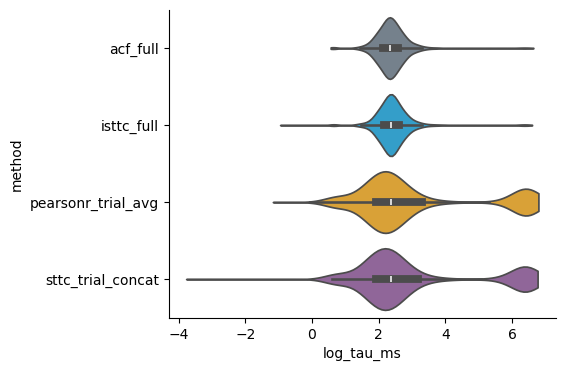

In [28]:
method_order = ['acf_full', 'isttc_full', 'pearsonr_trial_avg', 'sttc_trial_concat']
fig, axes = plt.subplots(1,1, figsize=(5, 4))

sns.violinplot(y='method', x='log_tau_ms', hue='method', order=method_order, hue_order=method_order, 
               palette=colors, data=tau_plot_long_df , cut=0, ax=axes)

sns.despine()

if save_fig:
    plt.savefig(fig_folder + 'mice_4_methods_taus_one_trials_impl_violins.png' , bbox_inches='tight', dpi=300)
    plt.savefig(fig_folder + 'mice_4_methods_taus_one_trials_impl_violins.svg' , bbox_inches='tight')

In [ ]:
tau_plot_long_df.query('method == "pearsonr_trial_avg" or method == "sttc_trial_concat"').groupby(by='method')['tau_diff_rel'].median()

In [ ]:
tau_plot_long_df.query('method == "pearsonr_trial_avg" or method == "sttc_trial_concat"').groupby(by='method')['r2_diff_rel'].median()

In [ ]:
# Total rows per method
df = tau_plot_long_df.query('method == "pearsonr_trial_avg" or method == "sttc_trial_concat"')
total_counts = df.groupby('method').size()

# Counts where r2_diff_rel > 0
positive_counts = df[df['r2_diff_rel'] > 0].groupby('method').size()

# Counts where r2_diff_rel < 0
negative_counts = df[df['r2_diff_rel'] < 0].groupby('method').size()

# Combine into one DataFrame
summary_df = pd.DataFrame({
    'total': total_counts,
    'count_r2_diff_rel_gt_0': positive_counts,
    'count_r2_diff_rel_lt_0': negative_counts
}).fillna(0).astype(int)

# Add percentages
summary_df['percent_gt_0'] = (summary_df['count_r2_diff_rel_gt_0'] / summary_df['total']) * 100
summary_df['percent_lt_0'] = (summary_df['count_r2_diff_rel_lt_0'] / summary_df['total']) * 100

summary_df

In [ ]:
method_order = ['pearsonr_trial_avg', 'sttc_trial_concat']

fig, axes = plt.subplots(1,2, figsize=(14, 4))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

sns.violinplot(y='method', x='tau_diff_rel_log10', hue='method', order=method_order, hue_order=method_order, 
               palette=colors2, data=tau_plot_long_df.query('method == "pearsonr_trial_avg" or method == "sttc_trial_concat"') , cut=0, ax=axes[0])

sns.violinplot(y='method', x='r2_diff_rel', hue='method', order=method_order, hue_order=method_order, 
               palette=colors2, data=tau_plot_long_df.query('method == "pearsonr_trial_avg" or method == "sttc_trial_concat"') , cut=0, ax=axes[1])
axes[1].axvline(x=0, lw=0.5, c='k')

sns.despine()

if save_fig:
    plt.savefig(fig_folder + 'mice_4_methods_taus_diff_rel_and_r2_one_trials_impl_violins.png' , bbox_inches='tight', dpi=300)
    plt.savefig(fig_folder + 'mice_4_methods_taus_diff_rel_and_r2_one_trials_impl_violins.svg' , bbox_inches='tight')

In [ ]:
# intervals for error plots
intervals = {
    '+-100':   (0,   100),
    '+-75':  (0,  75),
    '+-50':  (0,  50),
    '+-25':  (0,  25),
}

df = tau_plot_long_df.query('method == "pearsonr_trial_avg" or method == "sttc_trial_concat"').copy()

rows = []
for method, sub in df.groupby('method'):
    total = len(sub)
    row = {'method': method}
    for name, (lo, hi) in intervals.items():
        cnt = sub['tau_diff_rel'].between(lo, hi).sum()
        row[name] = cnt/total*100
    rows.append(row)

tau_plot_error_df = pd.DataFrame(rows).set_index('method')

# make long df
tau_plot_error_df = tau_plot_error_df.reset_index()
tau_plot_error_long_df = tau_plot_error_df.melt(
    id_vars='method',
    var_name='interval',
    value_name='percentage'
)
tau_plot_error_long_df

In [ ]:
# intervals for error plots
intervals_r2 = {
    '100':   (-1, 0),
    '75':  (-0.75, 0),
    '50':  (-0.50, 0),
    '25':  (-0.25, 0),
}

df = tau_plot_long_df.query('(method == "pearsonr_trial_avg" or method == "sttc_trial_concat") and r2_diff_rel < 0').copy()

rows = []
for method, sub in df.groupby('method'):
    total = len(sub)
    row = {'method': method}
    for name, (lo, hi) in intervals_r2.items():
        cnt = sub['r2_diff_rel'].between(lo, hi).sum()
        row[name] = cnt/total*100
    rows.append(row)

tau_plot_r2_df = pd.DataFrame(rows).set_index('method')

# make long df
tau_plot_r2_df = tau_plot_r2_df.reset_index()
tau_plot_r2_long_df = tau_plot_r2_df.melt(
    id_vars='method',
    var_name='interval',
    value_name='percentage'
)
tau_plot_r2_long_df

In [ ]:
# get percentage of units with tau_ms in 100% error range
df = tau_plot_long_df.query('method == "pearsonr_trial_avg" or method == "sttc_trial_concat"').copy()
mask = df['tau_diff_rel'].between(0, 100)
tau_plot_long_0_100perc_df = (
    df
    .groupby('method')
    .agg(
        total       = ('tau_diff_rel', 'size'),
        in_range    = ('tau_diff_rel', lambda x: x.between(0,100).sum())
    )
)
tau_plot_long_0_100perc_df['percent_in_range'] = tau_plot_long_0_100perc_df['in_range'] / tau_plot_long_0_100perc_df['total'] * 100
tau_plot_long_0_100perc_df = tau_plot_long_0_100perc_df.assign(
    percent_in_range=lambda d: d['percent_in_range'].map("{:.1f}%".format)
)
tau_plot_long_0_100perc_df

In [ ]:
def plot_one_threshold(axes_, percent_long_df):
    axes_.plot(
    percent_long_df.query('method == "pearsonr_trial_avg"')['interval'],
    percent_long_df.query('method == "pearsonr_trial_avg"')['percentage'],
    color=color_pearson_trail_avg, marker='o', markersize=5, linewidth=0.5, label='pearsonr_avg' 
    )
    # axes_.plot(
    # percent_long_df.query('method == "sttc_trial_avg"')['interval'],
    # percent_long_df.query('method == "sttc_trial_avg"')['percentage'],
    # color=color_sttc_trail_avg, marker='o', markersize=5, linewidth=0.5, label='sttc_avg' 
    # )
    axes_.plot(
    percent_long_df.query('method == "sttc_trial_concat"')['interval'],
    percent_long_df.query('method == "sttc_trial_concat"')['percentage'],
    color=color_sttc_trail_concat, marker='o', markersize=5, linewidth=0.5, label='sttc_concat' 
    )
    # axes_.plot(
    # percent_long_df.query('method == "acf_full"')['interval'],
    # percent_long_df.query('method == "acf_full"')['percentage'],
    # color=color_acf_full, marker='o', markersize=5, linewidth=0.5, label='acf_full' 
    # )
    # axes_.plot(
    # percent_long_df.query('method == "isttc_full"')['interval'],
    # percent_long_df.query('method == "isttc_full"')['percentage'],
    # color=color_isttc_full, marker='o', markersize=5, linewidth=0.5, label='isttc_full' 
    # )

def plot_one_threshold_jittered_lines(ax, df, jitter=0.15, seed=None, plot_lines=False):
    if seed is not None:
        np.random.seed(seed)

    methods = [
        ("pearsonr_trial_avg", color_pearson_trail_avg, "pearsonr_avg"),
        # ("sttc_trial_avg",     color_sttc_trail_avg,     "sttc_avg"),
        ("sttc_trial_concat",  color_sttc_trail_concat,  "sttc_concat"),
        # ("acf_full",           color_acf_full,           "acf_full"),
        # ("isttc_full",         color_isttc_full,         "isttc_full"),
    ]

    # fixed ordering of intervals
    cats = list(df["interval"].unique())
    idx_map = {cat:i for i,cat in enumerate(cats)}

    for method, col, label in methods:
        sub = df[df["method"] == method]
        # map string-labels to integer indices
        x0 = np.array([idx_map[s] for s in sub["interval"]])
        y  = sub["percentage"].values

        #  one jitter per point
        offsets = np.random.uniform(-jitter, jitter, size=len(x0))
        xj = x0 + offsets

        if plot_lines:
            order = np.argsort(x0)
            ax.plot(xj[order], y[order],
                    color=col,
                    linewidth=0.8,
                    alpha=1)
        # plot jittered points
        ax.scatter(xj, y,
                   color=col,
                   s=40,
                   marker="o",
                   label=label)

    ax.set_xticks(np.arange(len(cats)))
    ax.set_xticklabels(cats)

In [ ]:
fig, axes = plt.subplots(1,3,figsize=(12,3))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

plot_one_threshold(axes[0], tau_plot_error_long_df)

plot_one_threshold_jittered_lines(axes[1],
    tau_plot_error_long_df,
    jitter=0.3, seed=42)

plot_one_threshold_jittered_lines(axes[2],
    tau_plot_error_long_df,
    jitter=0.2, seed=42, plot_lines=True)

for ax in axes.flat:
    ax.set_ylabel('Percentage of \nspike trains')
    ax.set_xlabel('Relative estimation error (%)')
    ax.set_ylim([0, 85])
    ax.grid(True, which="both", axis='y', linestyle="--", linewidth=0.5, alpha=0.7)
    sns.despine(ax=ax)
    
axes[0].legend(frameon=False)


if save_fig:
    plt.savefig(fig_folder + 'mice_4_methods_taus_rel_error_one_trials_impl.png' , bbox_inches='tight', dpi=300)
    plt.savefig(fig_folder + 'mice_4_methods_taus_rel_error_one_trials_impl.svg' , bbox_inches='tight')

In [ ]:
fig, axes = plt.subplots(1,3,figsize=(12,3))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

plot_one_threshold(axes[0], tau_plot_r2_long_df)

plot_one_threshold_jittered_lines(axes[1],
    tau_plot_r2_long_df,
    jitter=0.3, seed=42)

plot_one_threshold_jittered_lines(axes[2],
    tau_plot_r2_long_df,
    jitter=0.2, seed=42, plot_lines=True)

for ax in axes.flat:
    ax.set_ylabel('Percentage of \nspike trains')
    ax.set_xlabel('Relative R-squared diff (%)')
    ax.set_ylim([0, 105])
    ax.grid(True, which="both", axis='y', linestyle="--", linewidth=0.5, alpha=0.7)
    sns.despine(ax=ax)
    
axes[0].legend(frameon=False)


if save_fig:
    plt.savefig(fig_folder + 'mice_4_methods_taus_rel_r2_one_trials_impl.png' , bbox_inches='tight', dpi=300)
    plt.savefig(fig_folder + 'mice_4_methods_taus_rel_r2_one_trials_impl.svg' , bbox_inches='tight')

In [ ]:
df = tau_plot_long_df.query('method == "pearsonr_trial_avg" or method == "sttc_trial_concat"').copy()

fig, axes = joypy.joyplot(data=df.query('tau_diff_rel >= 0 and tau_diff_rel <= 100'),
    by='method',
    column='tau_diff_rel',
    #range_style='own',
    ylim = 'max',
    grid="y",
    #kind='kde',
    hist=True, bins=50, fill=False,
    overlap=0.1,
    alpha=0.5,
    linewidth=1,
    x_range=[0,100]
)

#axes[-1].axvline(x=100, color='k', lw=0.5)

axes[-1].set_xlabel('Relative estimation error (%)')
#fig.suptitle('1000ms trials (n=40) vs full signal, tau = 100ms', y=1.05)


method_order = [
#    'acf_full',
#    'isttc_full',
    'pearsonr_trial_avg',
    'sttc_trial_concat',
]
for ax, method in zip(axes, method_order):
    tot    = tau_plot_long_0_100perc_df.at[method, 'total']
    inn    = tau_plot_long_0_100perc_df.at[method, 'in_range']
    pct    = tau_plot_long_0_100perc_df.at[method, 'percent_in_range']
    txt    = f"{inn}/{tot} ({pct})"
    # place in axis‐relative coords (x=95% from left, y=center)
    ax.text(
        0.95, 0.7, txt,
        transform = ax.transAxes,
        ha        = 'right',
        va        = 'center',
        fontsize  = 10,
        alpha     = 0.8
    )

if save_fig:
    plt.savefig(fig_folder + 'mice_4_methods_one_trial_impl_rel_error_hist.png' , bbox_inches='tight', dpi=300)
    plt.savefig(fig_folder + 'mice_4_methods_one_trial_impl_rel_error_hist.svg' , bbox_inches='tight')

In [ ]:
df = tau_plot_long_df.query('method == "pearsonr_trial_avg" or method == "sttc_trial_concat"').copy()
df

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(10, 3), sharey=False)

sns.regplot(x='fr_hz_spont_30min', y='tau_diff_rel_log10', data = tau_plot_long_df.query('method == "pearsonr_trial_avg" and fr_hz_spont_30min <= 10').copy(),
            scatter=None, ax=axes[0], label='pearsonr', color=color_pearson_trail_avg)
sns.regplot(x='fr_hz_spont_30min', y='tau_diff_rel_log10', data = tau_plot_long_df.query('method == "sttc_trial_concat" and fr_hz_spont_30min <= 10').copy(),
            scatter=None, ax=axes[0], label='isttc_concat', color=color_sttc_trail_concat)

sns.regplot(x='fr_hz_spont_30min', y='r2_diff_rel', data = tau_plot_long_df.query('method == "pearsonr_trial_avg" and fr_hz_spont_30min <= 10').copy(),
            scatter=None, ax=axes[1], label='pearsonr', color=color_pearson_trail_avg)
sns.regplot(x='fr_hz_spont_30min', y='r2_diff_rel', data = tau_plot_long_df.query('method == "sttc_trial_concat" and fr_hz_spont_30min <= 10').copy(),
            scatter=None, ax=axes[1], label='isttc_concat', color=color_sttc_trail_concat)

for ax in axes.flat:
    ax.legend(frameon=False)
    ax.set_xlabel('Firing rate (Hz)')

# for ax in axes.flat:
#     ax.set_ylabel('Log10 diff(IT, \nground truth) (ms)')

sns.despine()

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(10, 3), sharey=False)

sns.regplot(x='lv', y='tau_diff_rel_log10', data = tau_plot_long_df.query('method == "pearsonr_trial_avg" and fr_hz_spont_30min <= 10').copy(),
            scatter=None, ax=axes[0], label='pearsonr', color=color_pearson_trail_avg)
sns.regplot(x='lv', y='tau_diff_rel_log10', data = tau_plot_long_df.query('method == "sttc_trial_concat" and fr_hz_spont_30min <= 10').copy(),
            scatter=None, ax=axes[0], label='isttc_concat', color=color_sttc_trail_concat)

sns.regplot(x='lv', y='r2_diff_rel', data = tau_plot_long_df.query('method == "pearsonr_trial_avg" and fr_hz_spont_30min <= 10').copy(),
            scatter=None, ax=axes[1], label='pearsonr', color=color_pearson_trail_avg)
sns.regplot(x='lv', y='r2_diff_rel', data = tau_plot_long_df.query('method == "sttc_trial_concat" and fr_hz_spont_30min <= 10').copy(),
            scatter=None, ax=axes[1], label='isttc_concat', color=color_sttc_trail_concat)

for ax in axes.flat:
    ax.legend(frameon=False)
    ax.set_xlabel('Lv)')

# for ax in axes.flat:
#     ax.set_ylabel('Log10 diff(IT, \nground truth) (ms)')

sns.despine()

#### Export for stats

In [ ]:
long_stats_df = tau_plot_long_df.query('method == "pearsonr_trial_avg" or method == "sttc_trial_concat"').copy()
long_stats_df

In [ ]:
long_stats_df.to_csv(dataset_folder + 'tau_long_2trial_methods_df.csv')

In [ ]:
tau_plot_long_df.to_csv(dataset_folder + 'tau_long_4_methods_df.csv')

##### Wide and long tau dfs without NaNs